In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns

In [7]:
from google.colab import files
uploaded=files.upload()

Saving kc_house_data.csv.zip to kc_house_data.csv (1).zip


In [8]:
data = pd.read_csv("kc_house_data.csv.zip")
print(data.describe())

                 id         price  ...  sqft_living15     sqft_lot15
count  2.161300e+04  2.161300e+04  ...   21613.000000   21613.000000
mean   4.580302e+09  5.400881e+05  ...    1986.552492   12768.455652
std    2.876566e+09  3.671272e+05  ...     685.391304   27304.179631
min    1.000102e+06  7.500000e+04  ...     399.000000     651.000000
25%    2.123049e+09  3.219500e+05  ...    1490.000000    5100.000000
50%    3.904930e+09  4.500000e+05  ...    1840.000000    7620.000000
75%    7.308900e+09  6.450000e+05  ...    2360.000000   10083.000000
max    9.900000e+09  7.700000e+06  ...    6210.000000  871200.000000

[8 rows x 20 columns]


In [11]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# **MISSING VALUES**

In [13]:
data.isnull().sum().sum()

0

no missing values

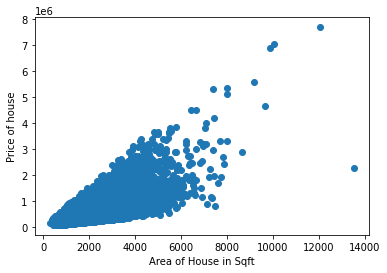

In [14]:
x=data['sqft_living']
y=data['price']
plt.scatter(x,y)
plt.xlabel("Area of House in Sqft")
plt.ylabel("Price of house")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


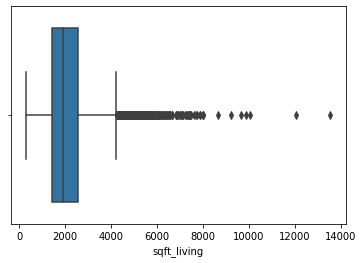

In [15]:
sns.boxplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


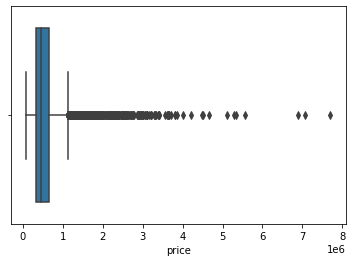

In [16]:
sns.boxplot(y)

In [17]:
from scipy import stats

data=data[['sqft_living','price']]
z=np.abs(stats.zscore(data))
filter=data[(z<3).all(axis=1)]
print(filter)
print(len(data))
len(filter)

       sqft_living     price
0             1180  221900.0
1             2570  538000.0
2              770  180000.0
3             1960  604000.0
4             1680  510000.0
...            ...       ...
21608         1530  360000.0
21609         2310  400000.0
21610         1020  402101.0
21611         1600  400000.0
21612         1020  325000.0

[21088 rows x 2 columns]
21613


21088

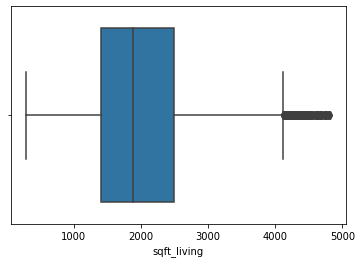

In [18]:
sns.boxplot(x=filter['sqft_living'])

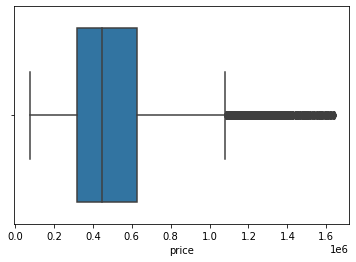

In [19]:
sns.boxplot(x=filter['price'])

In [20]:
len(filter)

21088

In [21]:
data

,sqft_living,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0
...,...,...
21608,1530,360000.0
21609,2310,400000.0
21610,1020,402101.0
21611,1600,400000.0


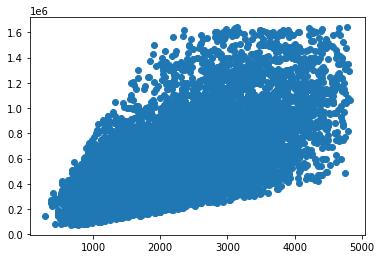

In [22]:
plt.scatter(filter['sqft_living'],filter['price'])

In [23]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
iqr

sqft_living      1123.0
price          323050.0
dtype: float64

In [24]:
print((data < (q1 - iqr*1.5)) | (data > (q3 + iqr*1.5)))

       sqft_living  price
0            False  False
1            False  False
2            False  False
3            False  False
4            False  False
...            ...    ...
21608        False  False
21609        False  False
21610        False  False
21611        False  False
21612        False  False

[21613 rows x 2 columns]


In [25]:
data.shape

(21613, 2)

In [26]:
data_cleared = data[~((data< (q1 - 1.5 * iqr)) |(data > (q3 + 1.5 * iqr))).any(axis=1)]
data_cleared.shape

(20292, 2)

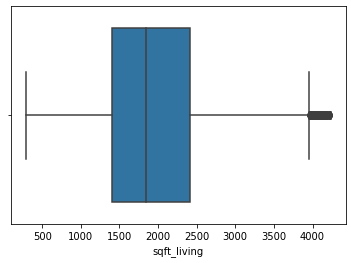

In [27]:
sns.boxplot(x=data_cleared['sqft_living'])

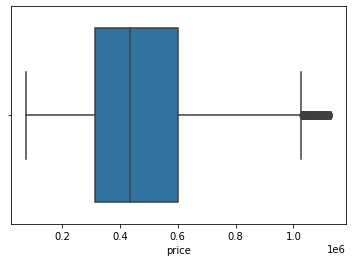

In [62]:
sns.boxplot(x=data_cleared['price'])

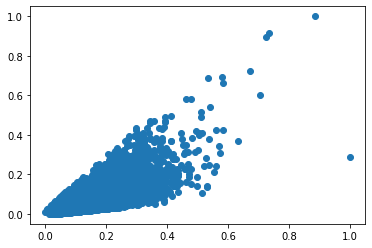

In [64]:
plt.scatter(x,y)

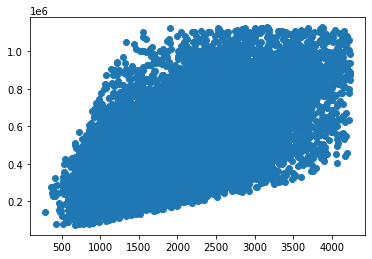

In [65]:
plt.scatter(data_cleared['sqft_living'],data_cleared['price'])

In [66]:
data_cleared.shape

(20292, 2)

In [67]:
x=data_cleared['sqft_living']
y=data_cleared['price']

# **Normalizing**

In [68]:
x=(x - x.min())/(x.max() - x.min())
y=(y - y.min())/(y.max() - y.min())
x=np.array(x)
y=np.array(y)

In [69]:
data2 = data_cleared.copy()

In [70]:
new_data=[]
for i in range(len(x)):
  new_data.append([x[i],y[i]])
new_data[:5]

[[0.22588832487309646, 0.1395724465558195],
 [0.5786802030456852, 0.4399049881235154],
 [0.1218274111675127, 0.0997624703087886],
 [0.42385786802030456, 0.5026128266033254],
 [0.35279187817258884, 0.41330166270783847]]

In [71]:
new_data = pd.DataFrame(new_data,columns=['sqft_living','price'])
new_data

,sqft_living,price
0,0.225888,0.139572
1,0.578680,0.439905
2,0.121827,0.099762
3,0.423858,0.502613
4,0.352792,0.413302
...,...,...
20287,0.314721,0.270784
20288,0.512690,0.308789
20289,0.185279,0.310785
20290,0.332487,0.308789


# **Splitting data into Training and Testing Data**

In [72]:
from sklearn.model_selection import train_test_split
data_train,data_test=train_test_split(new_data,test_size=0.1)

In [73]:
bs=1000
nb=np.ceil(len(data_train)/bs)
nb

19.0

# **Training The Model**

In [74]:
iter=1
epochs=100
batch=1
n=0.1
m=1
c=-1
error=[]

In [75]:
data_train

,sqft_living,price
7890,0.388325,0.361995
16382,0.340102,0.457957
14298,0.401015,0.516960
3531,0.205584,0.113843
13693,0.446701,0.389549
...,...,...
13291,0.180203,0.190024
4753,0.484772,0.280285
5983,0.299492,0.289786
17184,0.644670,0.440855


In [76]:

x = np.array(data_train['sqft_living'])
y = np.array(data_train['price'])
len(x)

18262

In [77]:

while (iter<=epochs):
  batch = 1
  while (batch<=nb):
    der_m=0
    der_c=0
    error=0
    for i in range(0,bs):
      der_m = der_m + (y[i] - (m*x[i]) - c)*x[i]
      der_c = der_c + (y[i] - (m*x[i]) - c)
    der_m = (-1/bs)*der_m
    der_c = (-1/bs)*der_c

    m_change = (-1)*n*der_m
    c_change = (-1)*n*der_c

    m = m + m_change
    c = c + c_change

    batch = batch + 1
  iter = iter + 1
print('Optimal values of m,c are : \n'+str(m),str(c))

Optimal values of m,c are : 
0.6376893199863458 0.10698983481662584


# **MSE of Training Data**

In [78]:
mse = 0
for i in range(0,len(data_train)):
  mse += (y[i] - (m*x[i]) -c)**2
mse = (1/len(data_train))*mse
mse

0.023885884783593103

In [79]:
data_test = np.array(data_test)
data_test_x = data_test[:,0]
print(data_test_x)
data_test_y = data_test[:,1]
data_test_y

[0.45939086 0.44923858 0.25634518 ... 0.37309645 0.39847716 0.43147208]


array([0.33396675, 0.18004751, 0.2023753 , ..., 0.20422803, 0.3156152 ,
       0.49406176])

In [80]:
len(data_test)

2030

In [81]:
predict = []
for i in range(len(data_test_x)):
  predict.append((m*data_test_x[i])+c)
predict[:10]

[0.39993848181542935,
 0.39346447856683703,
 0.2704584168435825,
 0.2623659127828421,
 0.6151990898311247,
 0.5569330605937938,
 0.5714995679031265,
 0.3287244460809136,
 0.3287244460809136,
 0.47277101836209323]

# **MSE of Testing Data**

In [82]:
mse=0
for i in range(0,len(data_test)):
  mse += (data_test[i][1] - (m*data_test[i][0]) - c)**2
mse = mse/len(data_test)
mse

0.023781721810093148

# **Visualizing Results of Testing Data**

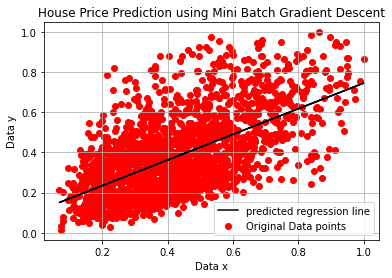

In [83]:
plt.scatter(data_test_x,data_test_y,label="Original Data points",color='red')
plt.plot(data_test_x,predict,color='black',label="predicted regression line")
plt.title("House Price Prediction using Mini Batch Gradient Descent")
plt.xlabel("Data x")
plt.ylabel("Data y")
plt.grid()
plt.legend()
plt.show()

In [84]:
data_train = pd.DataFrame(data_train)

data_train_pred = m*data_train['sqft_living'] + c
data_train_pred

7890     0.354620
16382    0.323869
14298    0.362713
3531     0.238088
13693    0.391846
           ...   
13291    0.221903
4753     0.416123
5983     0.297973
17184    0.518089
13542    0.362713
Name: sqft_living, Length: 18262, dtype: float64

# **Visualizing Training Data Results**

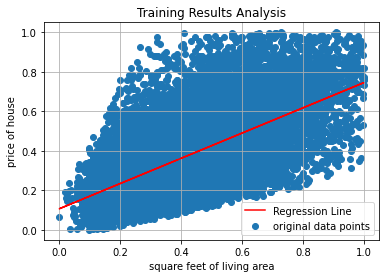

In [85]:
plt.plot(data_train['sqft_living'],data_train_pred,'red',label="Regression Line")
plt.scatter(data_train['sqft_living'],data_train['price'],label="original data points")
plt.xlabel("square feet of living area")
plt.ylabel("price of house")
plt.legend()
plt.grid()
plt.title("Training Results Analysis")
plt.show()
%matplotlib inline

# **Error Rate Results**

In [89]:
mse = 0
mse = (data_train['price'] - m*data_train['sqft_living'] - c)**2
mse.sum()/len(data_train)

0.02388588478359316

In [90]:
min_x = data2['sqft_living'].min()
max_x = data2['sqft_living'].max()
min_y = data2['price'].min()
max_y = data2['price'].max()
print(min_x,min_y,max_x,max_y)

290 75000.0 4230 1127500.0


# **Deployment of Model**

In [91]:
input_x = float(input("enter square feet : "))
input_x = (input_x - min_x)/(max_x - min_x)
output_y = m*input_x + c
output_y = (output_y)*(max_y - min_y) + min_y
output_y

enter square feet : 2345


537670.318677993